<a href="https://colab.research.google.com/github/Dheeraj16-code/labs-and-projects/blob/main/Implementing_KNN_from_scratch_and_visualize_Algorithm_performance_M3_L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
### MODULE 3: CLASSIFICATION-1
### LAB-3 : Implementing KNN from scratch and visualize Algorithm performance

---

# **Section 1: Implementing KNN**

In the last lab we had started discussing about KNN or K Nearest Neighbour method for clasification. We used the pre-built scikit-learn library for KNN. Now let's see how to implement this algorithm from scratch  

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [ ]:
def predict(training_features, training_labels, test_features, num_neighbors):
    distances = []
    targets = []
    for i in range(len(training_features)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(test_features - training_features[i, :]))), i])
    distances = sorted(distances)
    for i in range(num_neighbors):
        index = distances[i][1]
        targets.append(training_labels[index])
    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [ ]:
def k_nearest_neighbor(features_train, labels_train, features_test, num_nearest):

    assert num_nearest <= len(features_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predicted_labels = []
    for i in range(len(features_test)):
        predicted_labels.append(predict(features_train, labels_train, features_test[i, :], num_nearest))

    return np.asarray(predicted_labels)

**Note** : If k = 1 then the algorithm will simply return the label of the nearest neighbour. When we give k > 1 the most common label out of the given labels in the k neighbours will be selected.The code for 1 NN is given as follows and does not have to be so complicated.

In [ ]:
def NN1(features_train, labels_train, test_feature):
  differences  = features_train - test_feature
  squared_differences = differences * differences
  distances = squared_differences.sum(axis=1)
  nearest_index = np.argmin(distances)
  predicted_label = labels_train[nearest_index]
  return predicted_label

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [ ]:
def Accuracy(ground_truth_labels, predicted_labels):
  assert len(ground_truth_labels) == len(predicted_labels), "Length of the groundtruth labels and predicted labels should be the same"
  correct_count = (ground_truth_labels == predicted_labels).sum()
  return correct_count / len(ground_truth_labels)

## Section 1.1 - Iris Dataset
Let's try it out on Iris Dataset present in the scikit learn library

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris_dataset = load_iris()

iris_df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)

iris_df["species"] = iris_dataset.target

display(iris_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

input_features_array = np.array(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
output_labels_array = np.array(iris_df['species'])

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    input_features_array, output_labels_array, test_size=0.33, random_state=17
)

In [ ]:
# Making predictions with our custom KNN implementation
k_value = 7  # Setting the number of neighbors

# Generate predictions using the k_nearest_neighbor function
custom_predictions = k_nearest_neighbor(
    X_train_split, y_train_split, X_test_split, k_value
)

# Evaluating the accuracy of our custom implementation
custom_accuracy = Accuracy(y_test_split, custom_predictions)
print("The accuracy of our classifier is {} %".format(100 * custom_accuracy))

The accuracy of our classifier is 94.0 %


Voila! You have implemented your own version of the K-Nearest Neighbours algorithm, which works very well on the Iris Dataset. Congratulations!  

Now try out the sklearn implementation and compare your results.  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the scikit-learn KNN classifier
sklearn_classifier = KNeighborsClassifier(n_neighbors=7)

# Train the classifier
sklearn_classifier.fit(X_train_split, y_train_split)

# Make predictions
sklearn_predicted_labels = sklearn_classifier.predict(X_test_split)

# Calculate accuracy
sklearn_accuracy_score = accuracy_score(y_test_split, sklearn_predicted_labels)
print("The accuracy of Sklearn classifier is {} %".format(100 * sklearn_accuracy_score))

The accuracy of Sklearn classifier is 94.0 %


##  Section 1.2: Weighted NN
For KNN, If k is too small, the algorithm would be more sensitive to outliers. If k is too large, then the neighborhood may include too many points from other classes. We also take the label with max votes in the neighbourhood. Another choice can be that instead of giving equal weights to each of the neighbours we can give weighted points in the neighbourhood. So we weigh points by the inverse of their distance. Therefore, closer points will be given a higher priority as compared to the far off points.

An easy way to implement this is by specifying the 'weights' parameter as distance when defining the sklearn KNN function. For more information go through this [site](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
## TASK
## Modify the KNN function you wrote to return all the K-nearest neighbours along with their distances,
## instead of just the output that was most common. You don't need to find out accuracy, just modify the function
## and return the k-nearest neighbours and distances.

In [ ]:
def k_nearest_neighbor_with_distances(features_train, labels_train, features_test, num_nearest):

    assert num_nearest <= len(features_train), "[!] K cannot be larger than number of samples."

    all_nearest_neighbors_info = [] # To store info for all test points

    # loop over all observations
    for i in range(len(features_test)):
        distances = []
        for j in range(len(features_train)):
            # compute and store L2 distance and the index of the training sample
            distances.append([np.sqrt(np.sum(np.square(features_test[i, :] - features_train[j, :]))), j])

        # Sort distances and get the k nearest
        distances = sorted(distances)
        k_nearest = distances[:num_nearest]

        # Extract the neighbors' features, labels, and distances
        nearest_neighbors_info = []
        for dist, index in k_nearest:
            nearest_neighbors_info.append({
                'distance': dist,
                'index': index,
                'features': features_train[index, :],
                'label': labels_train[index]
            })
        all_nearest_neighbors_info.append(nearest_neighbors_info)

    return all_nearest_neighbors_info

# **Section 2: Visualizing Data**  

We will look into something called **Voronoi** diagrams.  

**Note**: Ideally, we should perform data visualization to see what the data looks like before we apply any Machine Learning algorithm.  Only for the purpose of this lab session, we're explaining it after you've applied KNN.

## Voronoi Diagrams: An Advanced Perspective

Voronoi diagrams offer a powerful way to partition a space based on proximity to a set of discrete points. Here's a systematic, point-wise breakdown:

1.  **Definition:** A Voronoi diagram is a partitioning of a plane into regions, where each region contains all points that are closer to a specific "seed" point (or generator) than to any other seed point in the set.

2.  **Voronoi Cells:** Each region in a Voronoi diagram is called a Voronoi cell. For a given seed point $P$, its Voronoi cell $V(P)$ is defined as the set of all points $Q$ in the space such that the distance between $Q$ and $P$ is less than or equal to the distance between $Q$ and any other seed point $R$ in the set. Mathematically:
    $V(P) = \{Q \text{ in space} \mid d(Q, P) \le d(Q, R) \text{ for all other seed points } R\}$

3.  **Borders and Vertices:** The boundaries of the Voronoi cells are formed by the perpendicular bisectors of the lines connecting adjacent seed points. The points where three or more cell boundaries meet are called Voronoi vertices. These vertices are equidistant from at least three seed points.

4.  **Influence of Distance Metric:** The shape and structure of the Voronoi diagram are fundamentally determined by the distance metric used.
    *   **Euclidean Distance (L2 norm):** This is the most common metric, resulting in straight-line boundaries and a diagram where the Voronoi cells are convex polygons.
    *   **Manhattan Distance (L1 norm):** Using this metric results in Voronoi cells with boundaries that are composed of segments at 45-degree angles, leading to a different partitioning of the space. The "influence" of a seed point spreads out like a diamond shape.
    *   **Other Metrics:** Different distance metrics (e.g., Chebyshev distance, Mahalanobis distance) will produce distinct Voronoi diagrams, reflecting how "closeness" is defined in that space.

5.  **Connection to KNN:** Voronoi diagrams have a direct relationship with the 1-Nearest Neighbor (1-NN) algorithm. For any point in space, its 1-NN is the seed point whose Voronoi cell the point falls into. In essence, the Voronoi diagram visually represents the decision boundaries of a 1-NN classifier.

6.  **Applications:** Voronoi diagrams have diverse applications across various fields, including:
    *   **Computational Geometry:** For spatial partitioning and analysis.
    *   **Biology:** Modeling biological structures and territories.
    *   **Meteorology:** Analyzing weather patterns and influence zones.
    *   **Urban Planning:** Determining service areas and optimal facility locations.
    *   **Data Visualization:** As demonstrated in this lab, for understanding the spatial distribution and influence of data points, particularly in relation to classification algorithms like KNN.

Understanding Voronoi diagrams provides valuable insight into the geometric underpinnings of proximity-based algorithms and how different distance metrics impact spatial relationships.

In [ ]:
#@title Plotting Voronoi regions
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = np.ptp(vor.points).max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

In [ ]:
#@title Plotting Voronoi regions
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

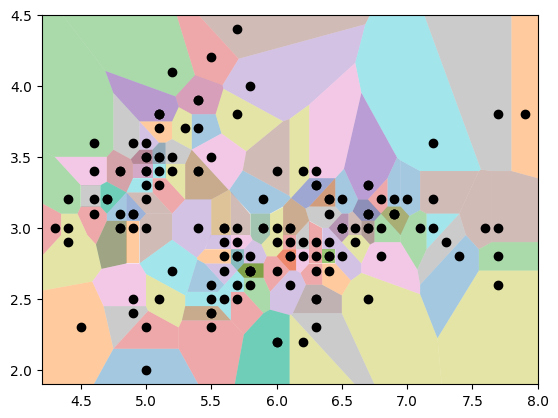

In [ ]:
# Plotting Voronoi regions for the Iris dataset
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np # Import numpy

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = np.ptp(vor.points).max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)


iris_dataset = load_iris()
iris_df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
iris_df["species"] = iris_dataset.target

feature_points = []
sepal_length_pts = np.array(iris_df['sepal length (cm)'])
sepal_width_pts = np.array(iris_df['sepal width (cm)'])

for i in range(len(sepal_length_pts)):
  feature_points.append([sepal_length_pts[i], sepal_width_pts[i]])
feature_points = np.array(feature_points)

# compute Voronoi tesselation
vor_diagram = Voronoi(feature_points)

regions_finite, vertices_finite = voronoi_finite_polygons_2d(vor_diagram)

for region in regions_finite:
    polygon = vertices_finite[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(feature_points[:,0], feature_points[:,1], 'ko')
plt.xlim(vor_diagram.min_bound[0] - 0.1, vor_diagram.max_bound[0] + 0.1)
plt.ylim(vor_diagram.min_bound[1] - 0.1, vor_diagram.max_bound[1] + 0.1)

plt.show()

In [ ]:
# Plotting Voronoi regions for the Iris dataset
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np # Import numpy

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")


## Section 2.2: Understanding Decision Boundaries  
So you have seen the Voronoi diagram of the dataset, implemented KNN, and also seen your algorithm's performance in terms of accuracy? Impressive!  
Wouldn't it also be great to know how exactly these 'votes' or neighbours are decided through some kind of visualization?  


### Decision Boundary

While the Voronoi diagram gave us a good idea of the points present in our dataset, to understand how KNN performed on our dataset we can plot decision boundaries. Decision boundaries, as the name suggests, divide the plane into different regions of classification.  

Note that here again, for simplicity, we have only considered first two attributes of the DataFrame (ie, Sepal Length and Sepal Width).  

In [ ]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

In [ ]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()


In [ ]:
## TASK-2
## In the above cells, we saw the Voronoi diagram of the data and plotted the KNN decision boundaries
## by only considering two attributes of the dataset. You must be already familiar with PCA.
## Apply PCA on the dataset above to reduce it to two dimensions.
## Plot the Voronoi diagram and Decision boundaries after that.

# Task
Apply PCA on the Iris dataset to reduce it to two dimensions. Plot the Voronoi diagram and Decision boundaries after applying PCA.

## Apply pca

### Subtask:
Use scikit-learn's PCA to reduce the Iris dataset to two principal components.


**Reasoning**:
Apply PCA to reduce the features to two dimensions and store the result.



In [ ]:
from sklearn.decomposition import PCA

features = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
labels = iris_df['species']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

## Prepare data for plotting

### Subtask:
Extract the reduced data (two principal components) and the corresponding species labels.


**Reasoning**:
Extract the two principal components and the species labels into separate variables for plotting.



## Section 2.3: Confusion Matrix  
In classification problems, a confusion matrix, also known as an error matrix, is a table that allows visualization of the performance of an algorithm, typically a supervised learning one. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import pandas as pd
# Use the correct variable names for the confusion matrix from the Car evaluation dataset
pd.crosstab(y_test_split, custom_predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,13,0,0,13
1,0,22,0,22
2,0,3,12,15
All,13,25,12,50


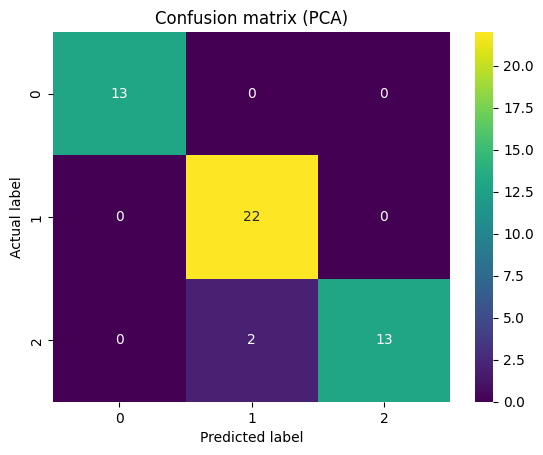

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split the PCA-transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, labels, test_size=0.33, random_state=17)

# Train a KNN classifier on the PCA-transformed training data
knn_pca = KNeighborsClassifier(n_neighbors=7)
knn_pca.fit(X_train_pca, y_train_pca)

# Make predictions on the PCA-transformed testing data
predictions_pca = knn_pca.predict(X_test_pca)

# Plot the confusion matrix
cnf_matrix = confusion_matrix(y_test_pca, predictions_pca)
sns.heatmap(cnf_matrix, annot=True, cmap="viridis", fmt='g')
plt.title('Confusion matrix (PCA)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Section 2.4: Classification Report

Precision, Recall, and F1-Score are other metrics besides accuracy that one might look for in an algorithm.  Depending on the use-case, one might consider one metric more important than the other.  

Note: *T-> True, F->False, P->Positive, N->Negative*
    
Mathematically, Accuracy is :  

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$  

**Precision**: The accuracy of positive predictions


$Precision = \frac{TP}{TP+FP}$

**Recall**:Fraction of positives that were correctly identified


$Recall = \frac{TP}{TP+FN}$


**F1-score**: Harmonic mean of precision and recall  


$F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$  



In [ ]:
# Upload the Car evaluation data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving car_evaluation (1).csv to car_evaluation (1).csv


In [ ]:
car_df = pd.read_csv('car_evaluation (1).csv')
car_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

X = car_df.drop('unacc', axis=1).values
y = car_df['unacc'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features (X) and target (y)
X = car_df.drop('unacc', axis=1)
y = car_df['unacc']

# Identify categorical features
categorical_features = X.columns

# Create a ColumnTransformer to apply one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns (none in this case)
)

# Create a pipeline with preprocessing and KNN classifier
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier(n_neighbors=7))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# Train the pipeline (which includes preprocessing and classification)
knn_pipeline.fit(X_train, y_train)

# Make predictions
predictions = knn_pipeline.predict(X_test)

# Calculate accuracy
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 91.52 %


## TASK-3
## Plot a Confusion Matrix for the results of the Car evaluation dataset

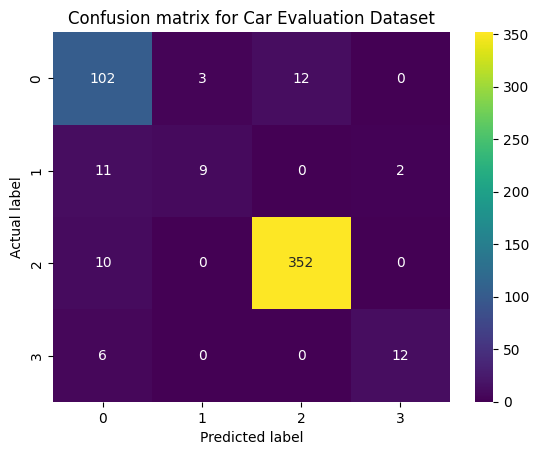

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cnf_matrix, annot=True, cmap="viridis", fmt='g')
plt.title('Confusion matrix for Car Evaluation Dataset')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
## TASK-5
## Plot the Decision boundary diagram for the classifier of the Car evaluation dataset

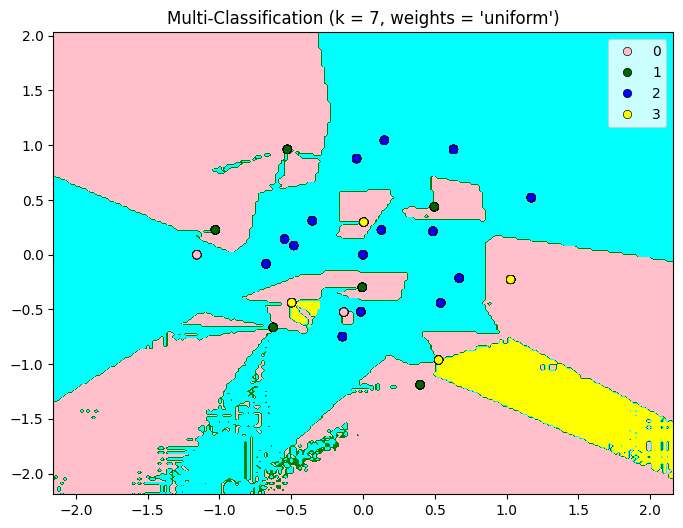

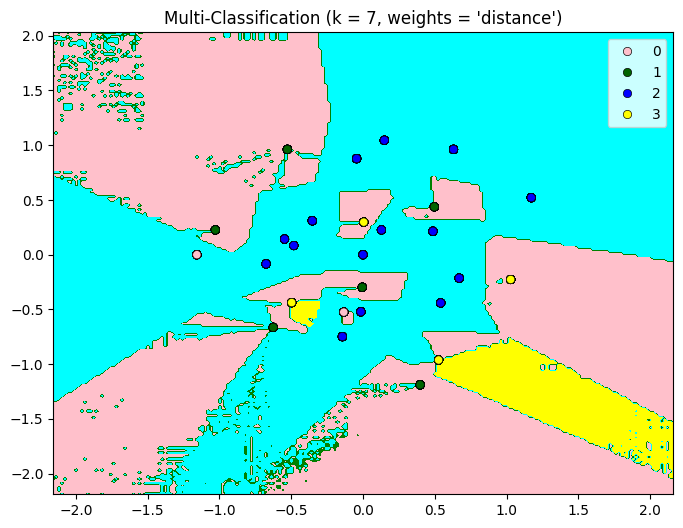

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Import pandas to use .iloc

# Separate features (X) and target (y) from car_df
X_car = car_df.drop('unacc', axis=1)
y_car = car_df['unacc']

# Identify categorical features
categorical_features_car = X_car.columns

# Create a ColumnTransformer to apply one-hot encoding
preprocessor_car = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_car)
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and PCA
pca_pipeline_car = Pipeline(steps=[('preprocessor', preprocessor_car),
                                   ('pca', PCA(n_components=2))])

# Apply PCA to the entire dataset
X_car_pca = pca_pipeline_car.fit_transform(X_car)

# Encode the target labels into numerical values
label_encoder = LabelEncoder()
y_car_encoded = label_encoder.fit_transform(y_car)


# Split the PCA-transformed data for plotting
# We'll use the entire dataset here for visualization of decision boundaries
X_plot = X_car_pca
y_plot = y_car_encoded # Use the encoded labels for plotting

# Call the decision_boundary_plot function
# Assuming decision_boundary_plot is defined in a previous cell
# Let's choose a k value, for example k=7 as used in the confusion matrix
k_value_car = 7
decision_boundary_plot(X_plot, y_plot, k_value_car)

# Task
Apply PCA on the Car evaluation dataset to reduce it to two dimensions, then plot the decision boundary diagram for the classifier using the PCA-transformed data.

## Apply pca

### Subtask:
Apply PCA to the Car evaluation dataset to reduce its dimensionality to two components.


**Reasoning**:
Apply PCA to reduce the dimensionality of the Car evaluation dataset to two components.



In [ ]:
## TASK-6
## Plot the Voronoi diagram for the classifier of the Car evaluation dataset

/tmp/ipython-input-3000191670.py:137: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))


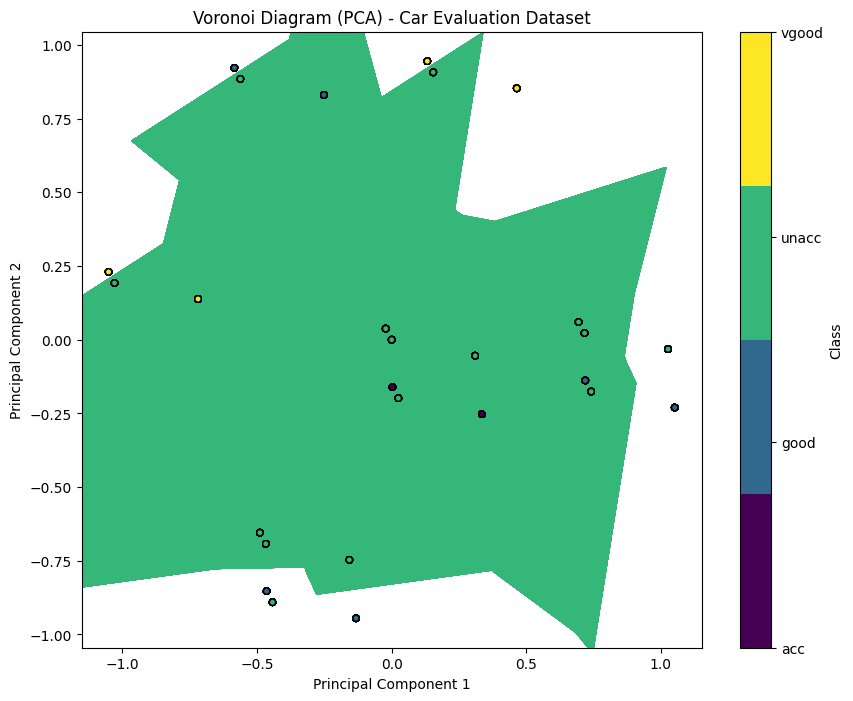

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import numpy as np

# Include the complete definition of voronoi_finite_polygons_2d
def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = np.ptp(vor.points).max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # Check if the point has any ridges before accessing all_ridges
        if p1 not in all_ridges:
            new_regions.append([v for v in vertices if v >= 0])
            continue


        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)


# Separate features (X) and target (y) from car_df
X_car = car_df.drop('unacc', axis=1)
y_car = car_df['unacc']

# Identify categorical features
categorical_features_car = X_car.columns

# Create a ColumnTransformer to apply one-hot encoding
preprocessor_car = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_car)
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and PCA
pca_pipeline_car = Pipeline(steps=[('preprocessor', preprocessor_car),
                                   ('pca', PCA(n_components=2))])

# Apply PCA to the entire dataset
X_car_pca = pca_pipeline_car.fit_transform(X_car)

# Train a KNN classifier on the PCA-transformed data (using the whole dataset for visualization purposes)
knn_pca_car = KNeighborsClassifier(n_neighbors=7)
knn_pca_car.fit(X_car_pca, y_car)

# Plotting Voronoi regions for the PCA-transformed Car evaluation dataset
vor_diagram_car = Voronoi(X_car_pca)

# Use the previously defined voronoi_finite_polygons_2d function
regions_finite_car, vertices_finite_car = voronoi_finite_polygons_2d(vor_diagram_car)

plt.figure(figsize=(10, 8))

# Get unique class labels for coloring
unique_labels = np.unique(y_car)
# Define a color map based on the number of unique labels
colors = plt.cm.get_cmap('viridis', len(unique_labels))
label_color_map = dict(zip(unique_labels, range(len(unique_labels))))

# Plotting the Voronoi regions with colors based on the class of the associated point
for region in regions_finite_car:
    if not region:
        continue
    polygon = vertices_finite_car[region]
    # Determine the class of the points associated with this Voronoi region for coloring
    # Find the index of the point for this region by looking up the region in vor.point_region
    point_index = -1
    for i, reg_idx in enumerate(vor_diagram_car.point_region):
         if vor_diagram_car.regions[reg_idx] == region:
             point_index = i
             break

    if point_index != -1:
        class_label = y_car.iloc[point_index]
        plt.fill(*zip(*polygon), alpha=0.4, color=colors(label_color_map[class_label]))


# Plot the data points with their actual class colors
scatter = plt.scatter(X_car_pca[:, 0], X_car_pca[:, 1], c=[label_color_map[label] for label in y_car], cmap=colors, edgecolor='k', s=20)

plt.title('Voronoi Diagram (PCA) - Car Evaluation Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xlim(vor_diagram_car.min_bound[0] - 0.1, vor_diagram_car.max_bound[0] + 0.1)
plt.ylim(vor_diagram_car.min_bound[1] - 0.1, vor_diagram_car.max_bound[1] + 0.1)
cbar = plt.colorbar(scatter, ticks=range(len(unique_labels)))
cbar.ax.set_yticklabels(unique_labels)
cbar.set_label('Class')
plt.show()

# Task
Apply PCA on the Car evaluation dataset to reduce it to two dimensions, then plot the Voronoi diagram and Decision boundaries.

## Apply pca

### Subtask:
Apply PCA to the Car evaluation dataset to reduce its dimensionality to two components.


**Reasoning**:
Apply PCA to reduce the dimensionality of the Car evaluation dataset to two components.



### Questions to Think About and Answer
1. In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the _weights_ set to 'uniform' and then set to 'distance'. Find out the difference between these two.  
2. What do you think could be the drawbacks of using KNN ?

Here are the answers to the questions:

1.  **Difference between 'uniform' and 'distance' weights in KNN:**
    *   **'uniform' weights:** All k-nearest neighbors have equal influence on the prediction. The predicted class is the majority class among the neighbors.
    *   **'distance' weights:** The influence of each k-nearest neighbor on the prediction is inversely proportional to its distance from the query point. Closer neighbors have more weight.

2.  **Drawbacks of using KNN:**
    *   **Computational Cost:** Can be slow for large datasets as it requires calculating distances to all training points for each prediction.
    *   **Sensitivity to Outliers:** Outliers can disproportionately affect the distance calculations and influence the neighborhood selection.
    *   **Curse of Dimensionality:** Performance degrades in high-dimensional spaces as distances become less discriminative.
    *   **Feature Scaling Dependency:** Requires features to be on a similar scale to avoid features with larger values dominating distance calculations.
    *   **Optimal k Selection:** Choosing the right value for 'k' is crucial and can be challenging; the best 'k' is dataset-dependent.